In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the MNIST dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train SVM classifier
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01)

In [6]:
# Predictions
y_pred = svm_model.predict(X_test_scaled)

In [7]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.9806

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



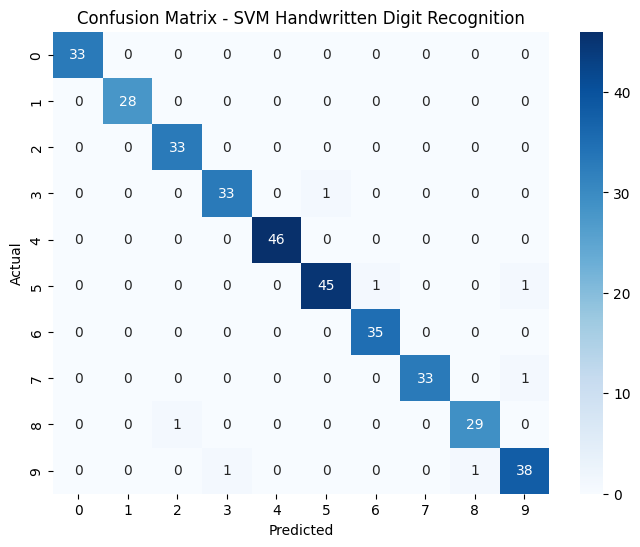

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Handwritten Digit Recognition")
plt.show()


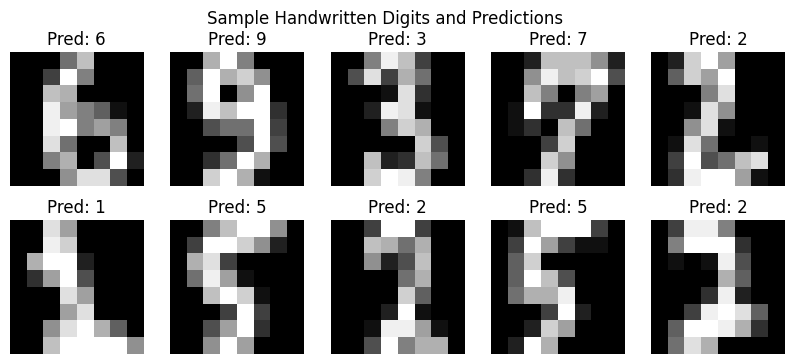

In [9]:
# Sample Digit Visualization
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f'Pred: {y_pred[i]}')
    plt.axis('off')
plt.suptitle("Sample Handwritten Digits and Predictions")
plt.show()


# Handwritten Digit Recognition using SVM

## Problem Statement
The goal of this project is to develop a Support Vector Machine (SVM) model to classify handwritten digits (0-9) using the MNIST dataset. The model should accurately distinguish between different digits based on pixel intensity values, ensuring high classification performance.

## Insights and Conclusion
- The SVM classifier achieves high accuracy in recognizing handwritten digits.
- The radial basis function (RBF) kernel enhances classification performance by capturing complex patterns in digit shapes.
- The confusion matrix indicates that most misclassifications occur between visually similar digits (e.g., 3 and 8, 4 and 9).
- Further improvements can be achieved through hyperparameter tuning, increasing training data, or adopting deep learning approaches like Convolutional Neural Networks (CNNs).
